In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Dataset/TopicExtraction/Pubmed5k.xlsx')

In [4]:
df.head()

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...


In [5]:
df["content"] = df["Title"] + ', ' + df["Abstract"]

In [6]:
import re

def clean_text(line):
    line = re.sub(r'\s+', ' ', line.lower())
    line = re.sub(r"\'", "", line)
    line = re.sub('[,\.!?]', '', line)
    tokens = [re.sub('[^a-zA-Z0-9]+', '', t) for t in line.split()]
    tokens = [t for t in tokens if not t.isdigit()]
    tokens = [t for t in tokens if len(t)>3]
    cleaned_line = " ".join(tokens)
    return cleaned_line.strip()

In [7]:
df['content'] = df['content'].apply(lambda x: clean_text(x))
df['content'].head()

0    stable coordination variability overground wal...
1    weak strength increases dynamic knee valgus si...
2    current future projections amyotrophic lateral...
3    disparities between asian nonasian thrombolyze...
4    maternal factors predicting loss followup from...
Name: content, dtype: object

In [8]:
from pprint import pprint

data = df.content.values.tolist()

pprint(data[:1])

['stable coordination variability overground walking running preferred fixed '
 'speeds coordination variability commonly analyzed understand dynamical '
 'qualities human locomotion purpose this study develop guidelines number '
 'trials required inform calculation stable mean lower limb during overground '
 'locomotion threedimensional lower limb kinematics were captured recreational '
 'runners performing trials each preferred fixed speed walking running stance '
 'phase calculated segment joint couplings using modified vector coding '
 'technique number trials required achieve mean within strides average '
 'determined each coupling individual statistical outputs mode walking running '
 'speed preferred fixed were compared when informed differing numbers trials '
 'minimum trials were required stable mean stance phase with fewer than trials '
 'underestimated oversight significant differences between mode speed future '
 'overground locomotion research healthy populations using vec

In [9]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['stable', 'coordination', 'variability', 'overground', 'walking', 'running', 'preferred', 'fixed', 'speeds', 'coordination', 'variability', 'commonly', 'analyzed', 'understand', 'dynamical', 'qualities', 'human', 'locomotion', 'purpose', 'this', 'study', 'develop', 'guidelines', 'number', 'trials', 'required', 'inform', 'calculation', 'stable', 'mean', 'lower', 'limb', 'during', 'overground', 'locomotion', 'lower', 'limb', 'kinematics', 'were', 'captured', 'recreational', 'runners', 'performing', 'trials', 'each', 'preferred', 'fixed', 'speed', 'walking', 'running', 'stance', 'phase', 'calculated', 'segment', 'joint', 'couplings', 'using', 'modified', 'vector', 'coding', 'technique', 'number', 'trials', 'required', 'achieve', 'mean', 'within', 'strides', 'average', 'determined', 'each', 'coupling', 'individual', 'statistical', 'outputs', 'mode', 'walking', 'running', 'speed', 'preferred', 'fixed', 'were', 'compared', 'when', 'informed', 'differing', 'numbers', 'trials', 'minimum', 't

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def build_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [12]:
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)#
trigram_mod = gensim.models.phrases.Phraser(trigram)

def build_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [13]:
def lemmatization(docs, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    for i in range(len(docs)):
        docs[i] = nlp(" ".join(docs[i])) 
        docs[i] = [token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in docs[i] if token.pos_ in allowed_postags]
    return docs

In [14]:
import spacy

data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = build_bigrams(data_words_nostops)
#data_words_trigrams = build_trigrams(data_words_nostops)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['stable', 'coordination', 'variability', 'overground', 'walk', 'run', 'preferred', 'fix', 'speed', 'coordination', 'variability', 'commonly', 'analyze', 'understand', 'dynamical', 'quality', 'locomotion', 'purpose', 'study', 'develop', 'guideline', 'number', 'trial', 'require', 'inform', 'calculation', 'stable', 'overground', 'kinematic', 'capture', 'recreational', 'runner', 'perform', 'trial', 'prefer', 'fix', 'speed', 'walk', 'run', 'stance', 'phase', 'calculate', 'segment', 'joint', 'coupling', 'use', 'modify', 'vector', 'coding', 'technique', 'number', 'trial', 'require', 'achieve', 'mean', 'stride', 'average', 'determine', 'couple', 'individual', 'statistical', 'output', 'mode', 'walk', 'running_spee', 'prefer', 'fix', 'compare', 'inform', 'differ', 'number', 'trial', 'minimum', 'trial', 'require', 'stable', 'mean', 'stance', 'phase', 'few', 'trial', 'underestimate', 'oversight', 'significant', 'difference', 'mode', 'speed', 'locomotion', 'research', 'healthy', 'population', 'us

In [15]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_lemmatized, test_size=0.2, shuffle=False)

del data_lemmatized

In [16]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(train_data)
train_corpus = [id2word.doc2bow(text) for text in train_data]
print(train_corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 2), (31, 2), (32, 2), (33, 2), (34, 1), (35, 1), (36, 4), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 2), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 3), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 8), (66, 1), (67, 1), (68, 2), (69, 2), (70, 2), (71, 3)]]


In [17]:
def build_LdaMulticore(corpus, id2word):
    return gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=10, 
                                      random_state=2,
                                      chunksize=128,
                                      passes=10,
                                      per_word_topics=True)

In [18]:
lda_model = build_LdaMulticore(train_corpus, id2word)
doc_lda = lda_model[train_corpus]

In [ ]:
from gensim.models import CoherenceModel

def compute_Coherence_score(model, data_lemmatized, id2word):
    coherence_model_lda = CoherenceModel(model=model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()


print('Coherence Score: ', compute_Coherence_score(lda_model, train_data, id2word))

In [ ]:
def compute_coherence_values(corpus, dictionary, text_data, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=2,
                                           chunksize=128,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text_data, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [21]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}
topics_range = range(5, 11, 1)
alpha = list(np.arange(0.5, 1, 0.1))
alpha.append('symmetric')
alpha.append('asymmetric')

beta = list(np.arange(0.5, 1, 0.1))
beta.append('symmetric')

num_of_docs = len(train_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(train_corpus, int(num_of_docs*0.8)), train_corpus]
corpus_title = ['80% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []}

pbar = tqdm.tqdm(total=len(corpus_sets)*len(topics_range)*len(alpha)*len(beta))

# for i in range(len(corpus_sets)):
#     for k in topics_range:
#         for a in alpha:
#             for b in beta:
#                 cv = compute_coherence_values(corpus=corpus_sets[i], 
#                                               dictionary=id2word, 
#                                               text_data=train_data,
#                                               k=k, a=a, b=b)
#                 model_results['Validation_Set'].append(corpus_title[i])
#                 model_results['Topics'].append(k)
#                 model_results['Alpha'].append(a)
#                 model_results['Beta'].append(b)
#                 model_results['Coherence'].append(cv)                
#                 pbar.update(1)                
# pbar.close()

  0%|          | 0/504 [00:00<?, ?it/s]

In [ ]:
res_df = pd.DataFrame(model_results)
res_df

In [ ]:
res_df.to_csv('lda_tuning_results.csv', index=False)

In [22]:
res_df = pd.read_csv("/content/drive/MyDrive/Dataset/TopicExtraction/lda_tuning_results.csv")
res_df

,Validation_Set,Topics,Alpha,Beta,Coherence
0,80% Corpus,5,0.5,0.5,0.409587
1,80% Corpus,5,0.5,0.6,0.413915
2,80% Corpus,5,0.5,0.7,0.403012
3,80% Corpus,5,0.5,0.7999999999999999,0.438306
4,80% Corpus,5,0.5,0.8999999999999999,0.451825
...,...,...,...,...,...
499,100% Corpus,10,asymmetric,0.6,0.473835
500,100% Corpus,10,asymmetric,0.7,0.458321
501,100% Corpus,10,asymmetric,0.7999999999999999,0.497700
502,100% Corpus,10,asymmetric,0.8999999999999999,0.462615


In [48]:
res_df_copy = res_df.copy()
res_df_copy.loc[res_df_copy["Beta"] == "symmetric", "Beta"] = 1
res_df_copy.loc[res_df_copy["Beta"] == "asymmetric", "Beta"] = 2

res_df_copy.loc[res_df_copy["Alpha"] == "symmetric", "Alpha"] = 1
res_df_copy.loc[res_df_copy["Alpha"] == "asymmetric", "Alpha"] = 2

res_df_copy["Beta"] = res_df_copy["Beta"].astype(float)
res_df_copy["Alpha"] = res_df_copy["Alpha"].astype(float)

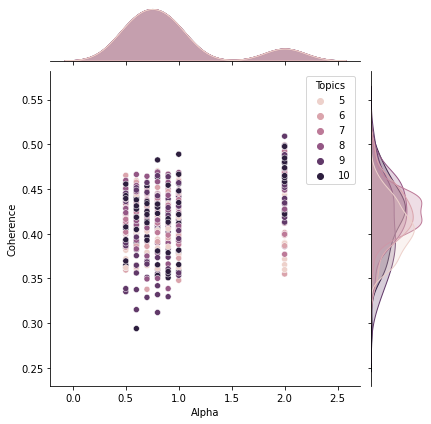

In [56]:
import seaborn as sns

sns.jointplot(x="Alpha",y="Coherence",data=res_df_copy,hue="Topics")

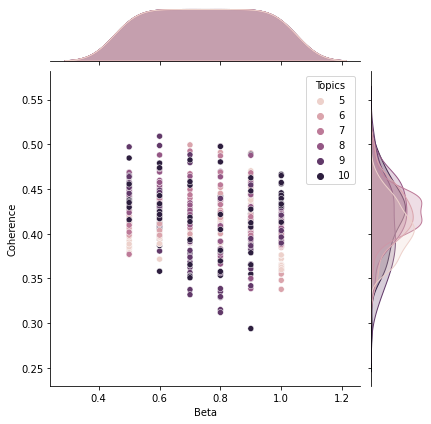

In [57]:
sns.jointplot(x="Beta",y="Coherence",data=res_df_copy,hue="Topics")

In [23]:
res_df.iloc[res_df['Coherence'].idxmax()]

Validation_Set    100% Corpus
Topics                      9
Alpha              asymmetric
Beta                      0.6
Coherence            0.509146
Name: 457, dtype: object

In [24]:
lda_model = gensim.models.LdaMulticore(corpus=train_corpus,
                                       id2word=id2word,
                                       num_topics=9, 
                                       random_state=2,
                                       chunksize=128,
                                       passes=10,
                                       alpha="asymmetric",
                                       eta=0.6)

In [25]:
!pip install pyldavis

     |████████████████████████████████| 1.7 MB 24.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f315442d1d9bedb8d9173c6b7aafac4dab7db3e4cd8d5a88563229b02e222d75
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [26]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, train_corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.272305  0.028622       1        1  46.381133
3      0.235706  0.063853       2        1  34.684243
1      0.074716 -0.183611       3        1  13.928374
6     -0.104119  0.045864       4        1   1.875208
2     -0.100545  0.007775       5        1   1.077903
0     -0.097112  0.016454       6        1   0.667233
4     -0.095513  0.007007       7        1   0.599835
5     -0.092921  0.006448       8        1   0.502845
7     -0.092517  0.007589       9        1   0.283226, topic_info=                 Term         Freq        Total Category  logprob  loglift
1874           specie   863.000000   863.000000  Default  30.0000  30.0000
165           patient  3198.000000  3198.000000  Default  29.0000  29.0000
359              cell  1369.000000  1369.000000  Default  28.0000  28.0000
1200        infection   659.000000   659.000000  Default  27.0000  27.0000
255         treatment  1221.000000  1221.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
27301   nonproduction     0.329456     6.181437   Topic9  -8.1511   2.9348
26706    semivolatile     0.285492     5.023863   Topic9  -8.2943   2.9989
26707  sixcompartment     0.285492     5.023863   Topic9  -8.2943   2.9989
26701         gaseous     0.349338    20.062541   Topic9  -8.0925   1.8161
18954          ageism     0.299975     7.043398   Topic9  -8.2448   2.7105

[492 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
18430      1  0.320634  abutment
18430      2  0.320634  abutment
18430      3  0.320634  abutment
1037       1  0.130645       ace
1037       2  0.130645       ace
...      ...       ...       ...
10982      3  0.025988     woody
10982      4  0.675696     woody
186        1  0.930765      year
186        2  0.062684      year
186        3  0.006648      year

[1509 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 2, 7, 3, 1, 5, 6, 8])

In [27]:
def get_docs_topic_score(corpus):
  topic_prop_list = list(lda_model.get_document_topics(corpus))
  n_topics = max(topic_prop_list, key=lambda item: len(item))

  lda_output = []
  for t in topic_prop_list:
    tmp_prop = [0 for _ in range(lda_model.num_topics)]
    for j in t:
      tmp_prop[j[0]] = j[1]
    lda_output.append(tmp_prop)

  return np.array(lda_output)

In [28]:
lda_output = get_docs_topic_score(train_corpus)

In [29]:
topicnames = ["Topic" + str(i) for i in range(lda_model.num_topics)] 
docnames = ["Doc" + str(i) for i in range(len(train_data))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.570000,8
Doc1,0.000000,0.000000,0.000000,0.100000,0.000000,0.130000,0.000000,0.000000,0.760000,8
Doc2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,8
Doc3,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,8
Doc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,8
Doc5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,8
Doc6,0.000000,0.410000,0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.230000,1
Doc7,0.000000,0.240000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.630000,8
Doc8,0.000000,0.300000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.580000,8
Doc9,0.000000,0.280000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.330000,3


In [30]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,8,1763
1,3,1577
2,1,588
3,6,60
4,0,6
5,2,2
6,4,2
7,5,1


In [31]:
def predict_topic(text, nlp=nlp, n_topics=3): 
    tmp_text = list(sent_to_words(text))
    tmp_text = [" ".join(t) for t in tmp_text]
    tmp_text = lemmatization(tmp_text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    corpus = [id2word.doc2bow(text) for text in tmp_text]
    topic_probability_scores = get_docs_topic_score(corpus)
    top_topic = np.argmax(topic_probability_scores)
    top_n_topic = (-topic_probability_scores).argsort(axis=1)[:n_topics][0]
    sorted_topic_probability_scores = topic_probability_scores.copy()
    sorted_topic_probability_scores.sort(axis=1)
    sorted_topic_probability_scores = sorted_topic_probability_scores[0][::-1]
    topic_keywords = lda_model.get_topic_terms(top_topic, topn=10)
    
    return top_topic, top_n_topic, sorted_topic_probability_scores, topic_probability_scores, topic_keywords

text = [test_data[0]]
top_topic, top_n_topic, sorted_topic, _, _ = predict_topic(text = text)
print(top_topic)
print(top_n_topic)
print(sorted_topic)


3
[3 5 7 0 1 2 4 6 8]
[0.54026639 0.24202104 0.21149504 0.         0.         0.
 0.         0.         0.        ]


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [32]:

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

svd_model = TruncatedSVD(n_components=3) 
lda_output_svd = svd_model.fit_transform(lda_output)
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
z = lda_output_svd[:, 2]

print("Component's weights: \n", np.round(svd_model.components_, 2))

print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.01  0.17  0.01  0.43  0.01  0.01  0.02  0.    0.88]
 [ 0.01  0.08  0.    0.89  0.    0.    0.04  0.   -0.45]
 [-0.01  0.98 -0.   -0.15 -0.   -0.   -0.04 -0.   -0.11]]
Perc of Variance Explained: 
 [0.13 0.64 0.18]


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

No handles with labels found to put in legend.


Text(0.5, 0.92, 'Segregation of Topic Clusters')

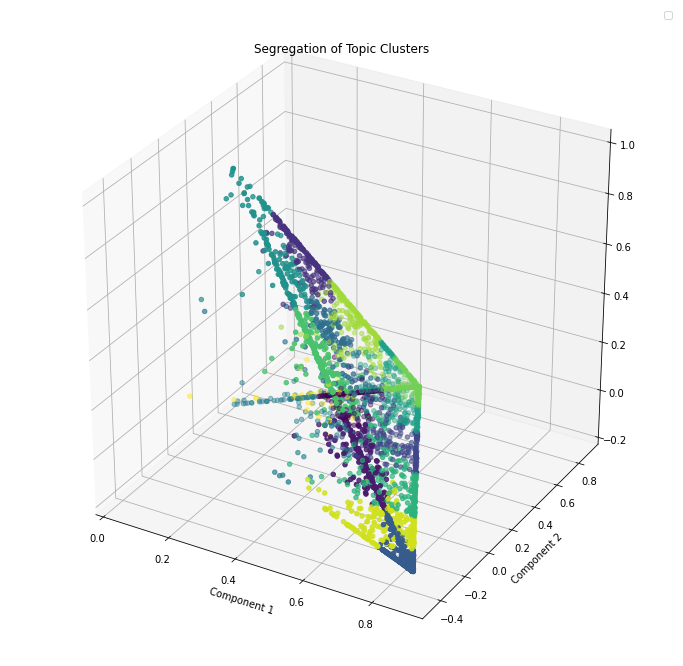

In [33]:
from matplotlib import pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=clusters)
ax.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("Segregation of Topic Clusters")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 0, 'Component 2')

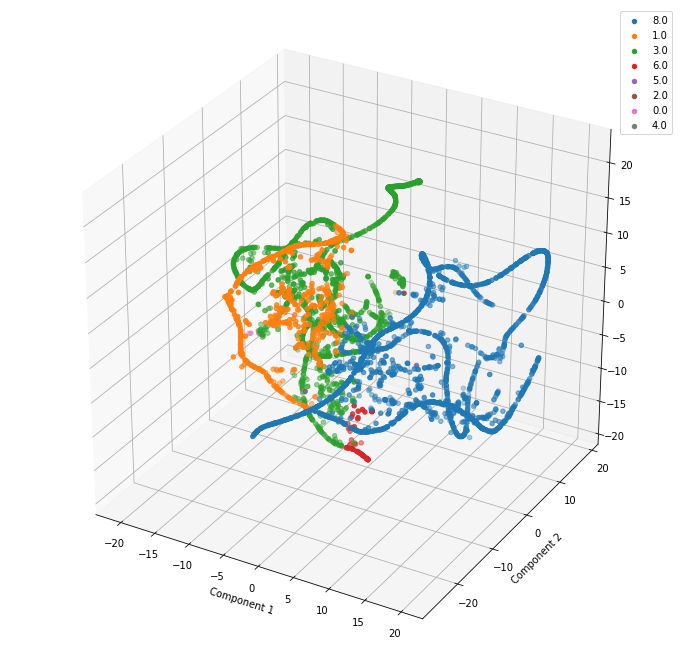

In [34]:
from sklearn.manifold import TSNE
import pylab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(lda_output)

#x, y, z = list(zip(*projections))

vis_df = projections.copy()
topics = np.argmax(lda_output, axis=1).reshape(-1,1)
vis_df = np.hstack((vis_df, topics))
vis_df = pd.DataFrame(data=vis_df, columns=['x', 'y', 'z', 
                                            'topic'])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for t in vis_df.topic.unique():
    ax.scatter(vis_df.x[vis_df.topic==t], 
               vis_df.y[vis_df.topic==t], 
               vis_df.z[vis_df.topic==t],
               label=t)
    
ax.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [35]:
from sklearn.metrics.pairwise import euclidean_distances

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    top_topic, top_n_topic, sorted_topic_probability_scores, topic_probability_scores, _ = predict_topic(text)
    dists = euclidean_distances(topic_probability_scores.reshape(1, -1), doc_topic_probs)    
    doc_ids = np.argsort(dists[0])
    doc_ids = doc_ids[:top_n]
    if verbose:        
        print("Top Topic : ", top_topic)
        print("Top N Topic: ", top_n_topic)
        print("Topic Prob Sorted Scores of text: ", np.round(sorted_topic_probability_scores, 2))
        print("Most Similar Doc's Probs:  \n", np.round(doc_topic_probs[doc_ids], 2))
    return doc_ids, np.take(documents, doc_ids)

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [36]:
text = [test_data[0]]

doc_ids, docs = similar_documents(text=text, doc_topic_probs=lda_output, documents = data, top_n=3, verbose=True)
print(docs)

Top Topic :  3
Top N Topic:  [3 7 5 0 1 2 4 6 8]
Topic Prob Sorted Scores of text:  [0.54 0.37 0.09 0.   0.   0.   0.   0.   0.  ]
Most Similar Doc's Probs:  
 [[0.   0.   0.   0.61 0.   0.   0.   0.37 0.  ]
 [0.   0.   0.   0.62 0.   0.   0.   0.37 0.  ]
 [0.   0.   0.   0.54 0.   0.   0.   0.32 0.14]]
['manganesepromoted cleavage acetylacetonate resembling diketone cleaving dioxygenase dke1 reactivity here report manganesebased oxidative cleavage inactivated acetylacetonate mechanistic pathway which resembles dke1catalyzed reactions diketone aketo acid this oxidative transformation proceeds through acetylacetonatepyruvateoxalate pathway which terminated stage pyruvate through ligandsolvent variation timedependent gcms isotopelabeling studies suggested that system represents same cleaving specificity dioxygenaselike reactivity dke1'
 'reconfigurable pickering emulsions with functionalized carbon nanotubes pickering emulsions achieve interfacial stabilization colloidal particle surfact

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
